In [1]:
# Task 1 – Data Preparation (Local data/wdbc.data)
import sys
from pathlib import Path

ROOT = Path.cwd().parents[1] 
sys.path.append(str(ROOT / "src"))

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from paths import OUTPUTS
from utils import savefig

RNG = 42 #sets a fixed random seed so that splitting the dataset into training, validation, and test sets produce the same results every time the code is run

In [2]:
# Load directly from scikit-learn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print(f"Shape: X{X.shape}, y{y.shape}")
display(X.head(5))

# Class distribution
counts = y.value_counts().rename("count").to_frame()
counts.index.name = "target (0=malignant,1=benign)"
counts["percent"] = (counts["count"] / len(y) * 100).round(2)
display(counts)
counts.to_csv(OUTPUTS / "class_distribution.csv")


Shape: X(569, 30), y(569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,count,percent
"target (0=malignant,1=benign)",,
1,357,62.74
0,212,37.26


The dataset contains 30 numerical features describing characteristics of cell nuclei (e.g. mean radius, mean texture, mean smoothness, etc.).
Each row represents one tumor sample.
The target column (target) indicates whether a tumor is:
0 = malignant (M, cancerous tumor)
1 = benign (B, non-cancerous tumor)

The dataset is moderately imbalanced — about 63% benign and 37% malignant cases.
While this is not a severe imbalance, models trained on this data could still be slightly biased toward predicting the majority class (benign).

,Mean (raw),Std (raw),Min (raw),Max (raw),Mean (std),Std (std),Min (std),Max (std)
Feature,,,,,,,,
mean radius,14.067,3.463,6.981,25.220,-0.0,1.001,-2.049,3.226
mean texture,19.302,4.564,9.710,39.280,0.0,1.001,-2.105,4.383
mean perimeter,91.511,23.861,43.790,171.500,0.0,1.001,-2.003,3.357
mean area,647.824,333.930,143.500,1878.000,0.0,1.001,-1.512,3.689
mean smoothness,0.096,0.013,0.063,0.140,-0.0,1.001,-2.519,3.332
mean compactness,0.103,0.053,0.019,0.345,-0.0,1.001,-1.563,4.565
mean concavity,0.088,0.081,0.000,0.426,-0.0,1.001,-1.085,4.160
mean concave points,0.048,0.038,0.000,0.184,-0.0,1.001,-1.258,3.600
mean symmetry,0.181,0.029,0.117,0.304,0.0,1.001,-2.240,4.312


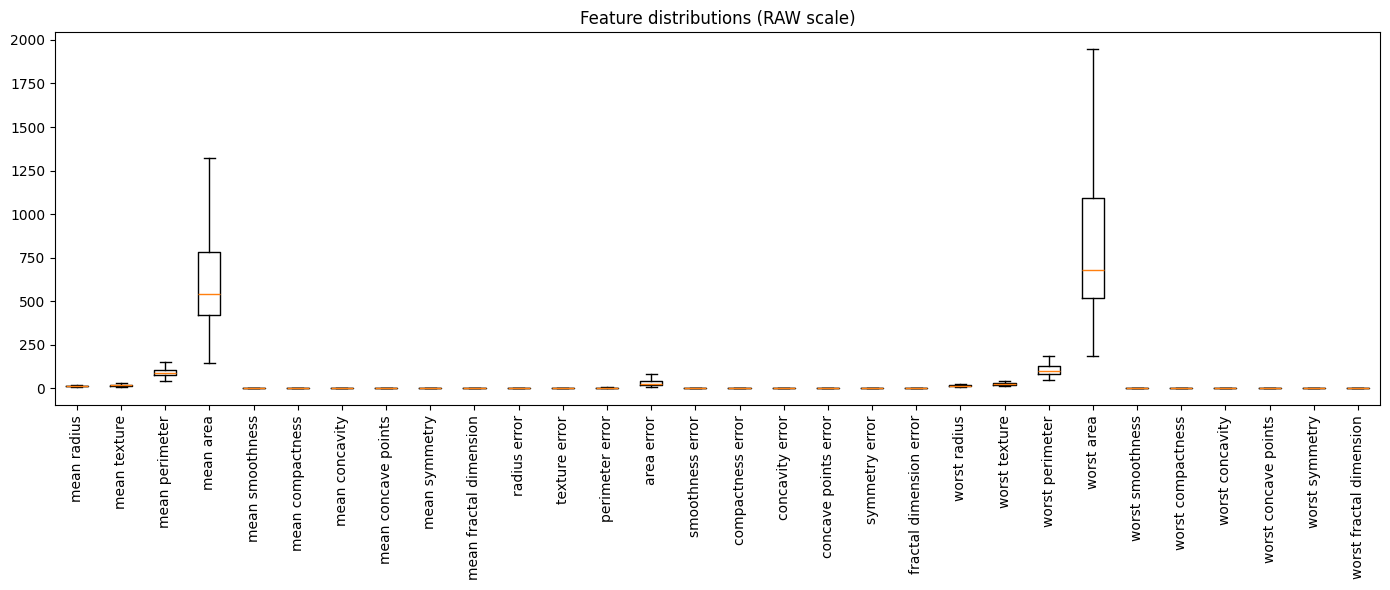

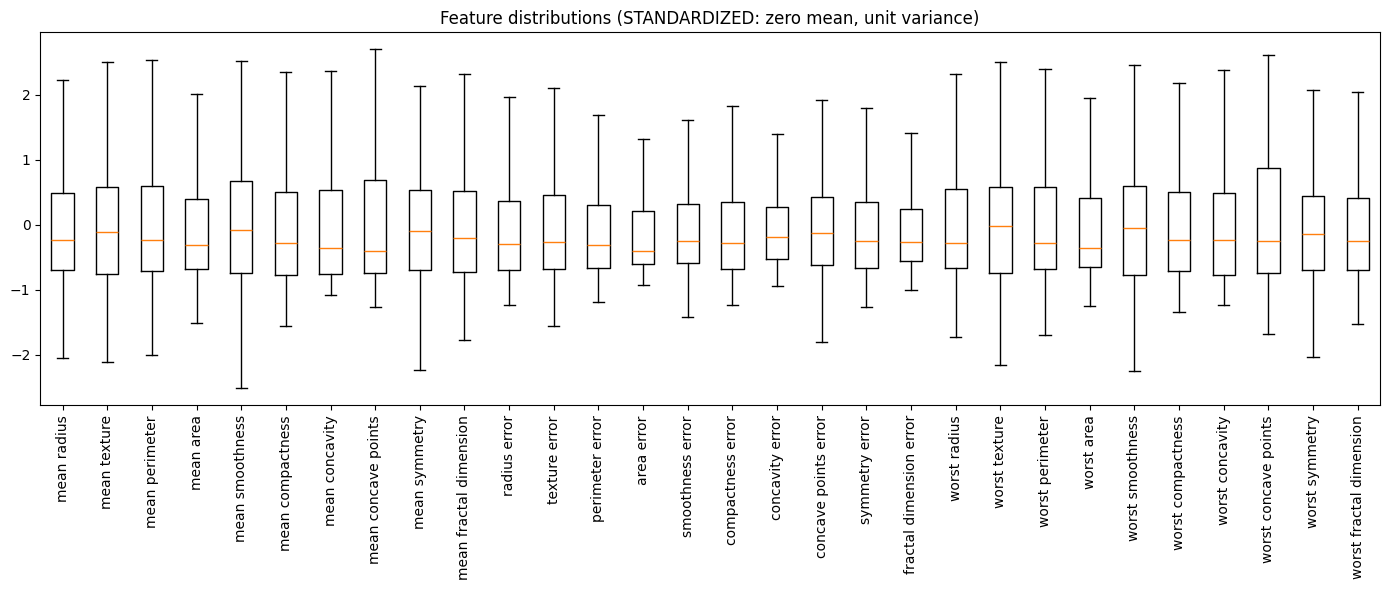

Average std BEFORE scaling: 33.19, AFTER scaling: 1.0


In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=RNG
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=RNG
)

# --- 1. DESCRIPTIVE STATS before standardization ---
summary_raw = X_train.describe().T[['mean', 'std', 'min', 'max']].round(3)
summary_raw.index.name = 'Feature'
summary_raw.columns = ['Mean (raw)', 'Std (raw)', 'Min (raw)', 'Max (raw)']

# --- 2. STANDARDIZE (zero mean, unit variance) ---
scaler = StandardScaler().fit(X_train)
X_train_s = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
summary_std = X_train_s.describe().T[['mean', 'std', 'min', 'max']].round(3)
summary_std.index.name = 'Feature'
summary_std.columns = ['Mean (std)', 'Std (std)', 'Min (std)', 'Max (std)']

# --- Combine into one table for comparison ---
summary_compare = pd.concat([summary_raw, summary_std], axis=1)
display(summary_compare)

# --- 3. VISUALIZATION ---
plt.figure(figsize=(14, 6))
plt.boxplot(X_train.values, showfliers=False)
plt.xticks(range(1, X_train.shape[1] + 1), X_train.columns, rotation=90)
plt.title("Feature distributions (RAW scale)")
plt.tight_layout()
savefig("boxplot_features_raw.png")
plt.show()


plt.figure(figsize=(14, 6))
plt.boxplot(X_train_s.values, showfliers=False)
plt.xticks(range(1, X_train_s.shape[1] + 1), X_train_s.columns, rotation=90)
plt.title("Feature distributions (STANDARDIZED: zero mean, unit variance)")
plt.tight_layout()
savefig("boxplot_features_standardized.png")
plt.show()

# --- 4. Compare variation numerically ---
raw_var = X_train.std().mean().round(2)
std_var = X_train_s.std().mean().round(2)
print(f"Average std BEFORE scaling: {raw_var}, AFTER scaling: {std_var}")

Before standardization, the features in the dataset vary widely in scale — for instance, mean area can reach values above 1200, while mean smoothness remains below 0.2. This imbalance causes models that rely on distances or gradients, such as SVMs or logistic regression, to give more weight to features with larger numerical ranges. After applying standardization, all features are centered around zero with a standard deviation close to one, ensuring that each contributes equally during training. This leads to faster convergence and more stable learning. Therefore, the standardized version is generally more suitable for most models, while tree-based models remain largely unaffected by scaling.

Why a three-way split:

- Train: used to fit the model parameters.
- Validation: used to tune hyperparameters (e.g., C and gamma for SVM).
  This prevents information from the test set from leaking into model selection.
- Test: used only once at the end for final evaluation of generalization.

This structure provides a more robust and realistic estimate of model performance.